In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_excel('../data/220812.xlsx')
data = data.fillna(method='ffill')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Total Accuracy,Accuracy_OSA,Accuracy_insomnia,"Accuracy_PLMD,RLS",Accuracy_parasomnia,Accuracy_circadian,...,"F1_PLMD,RLS",F1_parasomnia,F1_circadian,"F1_Narcolepsy,EDS,Hypersomnia",F1_Catathrenia,F1_control,F1_micro,F1_macro,F1_weighted,F1_samples
0,Logistic Regression,A,MultiOutputClassifier,method A,0.685567,0.845361,0.889175,0.912371,0.976804,0.974227,...,0.0,0.742857,0.0,0.333333,0,0.521739,0.768647,0.339597,0.706885,0.738660
1,Logistic Regression,A,MultiOutputClassifier,method B,0.677835,0.840206,0.891753,0.912371,0.976804,0.974227,...,0.0,0.742857,0.0,0.250000,0,0.510638,0.764411,0.331398,0.705961,0.737801
2,Logistic Regression,A,ClassifierChain,method A,0.731959,0.845361,0.899485,0.904639,0.979381,0.974227,...,0.0,0.750000,0.0,0.285714,0,0.515152,0.768116,0.362779,0.727565,0.778179
3,Logistic Regression,A,ClassifierChain,method B,0.719072,0.824742,0.894330,0.914948,0.976804,0.979381,...,0.0,0.666667,0.0,0.000000,0,0.566038,0.766749,0.306318,0.706400,0.759794
4,Logistic Regression,B,MultiOutputClassifier,method A,0.694377,0.845966,0.907090,0.929095,0.965770,0.992665,...,0.0,0.562500,0.4,0.250000,0,0.434783,0.779412,0.373498,0.732809,0.744906


In [7]:
data.rename(columns={'Unnamed: 0':'ML_Algorithm', 'Unnamed: 1':'dataset', 'Unnamed: 2': 'multi label', 'Unnamed: 3': 'grid search method'}, inplace=True)
data.head()

,ML_Algorithm,dataset,multi label,grid search method,Total Accuracy,Accuracy_OSA,Accuracy_insomnia,"Accuracy_PLMD,RLS",Accuracy_parasomnia,Accuracy_circadian,...,"F1_PLMD,RLS",F1_parasomnia,F1_circadian,"F1_Narcolepsy,EDS,Hypersomnia",F1_Catathrenia,F1_control,F1_micro,F1_macro,F1_weighted,F1_samples
0,Logistic Regression,A,MultiOutputClassifier,method A,0.685567,0.845361,0.889175,0.912371,0.976804,0.974227,...,0.0,0.742857,0.0,0.333333,0,0.521739,0.768647,0.339597,0.706885,0.738660
1,Logistic Regression,A,MultiOutputClassifier,method B,0.677835,0.840206,0.891753,0.912371,0.976804,0.974227,...,0.0,0.742857,0.0,0.250000,0,0.510638,0.764411,0.331398,0.705961,0.737801
2,Logistic Regression,A,ClassifierChain,method A,0.731959,0.845361,0.899485,0.904639,0.979381,0.974227,...,0.0,0.750000,0.0,0.285714,0,0.515152,0.768116,0.362779,0.727565,0.778179
3,Logistic Regression,A,ClassifierChain,method B,0.719072,0.824742,0.894330,0.914948,0.976804,0.979381,...,0.0,0.666667,0.0,0.000000,0,0.566038,0.766749,0.306318,0.706400,0.759794
4,Logistic Regression,B,MultiOutputClassifier,method A,0.694377,0.845966,0.907090,0.929095,0.965770,0.992665,...,0.0,0.562500,0.4,0.250000,0,0.434783,0.779412,0.373498,0.732809,0.744906


In [8]:
df = data.pivot_table(index='ML_Algorithm', columns=['dataset', 'multi label', 'grid search method'], values='Total Accuracy')
df

dataset                           A                                            \
multi label         ClassifierChain           MultiOutputClassifier             
grid search method         method A  method B              method A  method B   
ML_Algorithm                                                                    
LightGBM                   0.729381       NaN              0.713918       NaN   
Logistic Regression        0.731959  0.719072              0.685567  0.677835   
Random Forest              0.708763  0.716495              0.688144  0.693299   
SVM                        0.680412       NaN              0.680412       NaN   
XGBoost                    0.739691       NaN              0.701031       NaN   

dataset                           B                                            
multi label         ClassifierChain           MultiOutputClassifier            
grid search method         method A  method B              method A  method B  
ML_Algorithm                                                                   
LightGBM                   0.733496       NaN              0.706601       NaN  
Logistic Regression        0.738386  0.721271              0.694377  0.689487  
Random Forest              0.723716  0.731051              0.704156  0.696822  
SVM                        0.684597       NaN              0.684597       NaN  
XGBoost                    0.726161       NaN              0.684597       NaN

In [9]:
data_columns = data.columns[4:].tolist()
cols_list = [data_columns[i:i+6] for i in range(0, len(data_columns), 6)]

In [10]:
cols_list

[['Total Accuracy',
  'Accuracy_OSA',
  'Accuracy_insomnia',
  'Accuracy_PLMD,RLS',
  'Accuracy_parasomnia',
  'Accuracy_circadian'],
 ['Accuracy_Narcolepsy,EDS,Hypersomnia',
  'Accuracy_Catathrenia',
  'Accuracy_control',
  'Precision_OSA',
  'Precision_insomnia',
  'Precision_PLMD,RLS'],
 ['Precision_parasomnia',
  'Precision_circadian',
  'Precision_Narcolepsy,EDS,Hypersomnia',
  'Precision_Catathrenia',
  'Precision_control',
  'Precision_micro'],
 ['Precision_macro',
  'Precision_weighted',
  'Precision_samples',
  'Recall_OSA',
  'Recall_insomnia',
  'Recall_PLMD,RLS'],
 ['Recall_parasomnia',
  'Recall_circadian',
  'Recall_Narcolepsy,EDS,Hypersomnia',
  'Recall_Catathrenia',
  'Recall_control',
  'Recall_micro'],
 ['Recall_macro',
  'Recall_weighted',
  'Recall_samples',
  'F1_OSA',
  'F1_insomnia',
  'F1_PLMD,RLS'],
 ['F1_parasomnia',
  'F1_circadian',
  'F1_Narcolepsy,EDS,Hypersomnia',
  'F1_Catathrenia',
  'F1_control',
  'F1_micro'],
 ['F1_macro', 'F1_weighted', 'F1_samples'

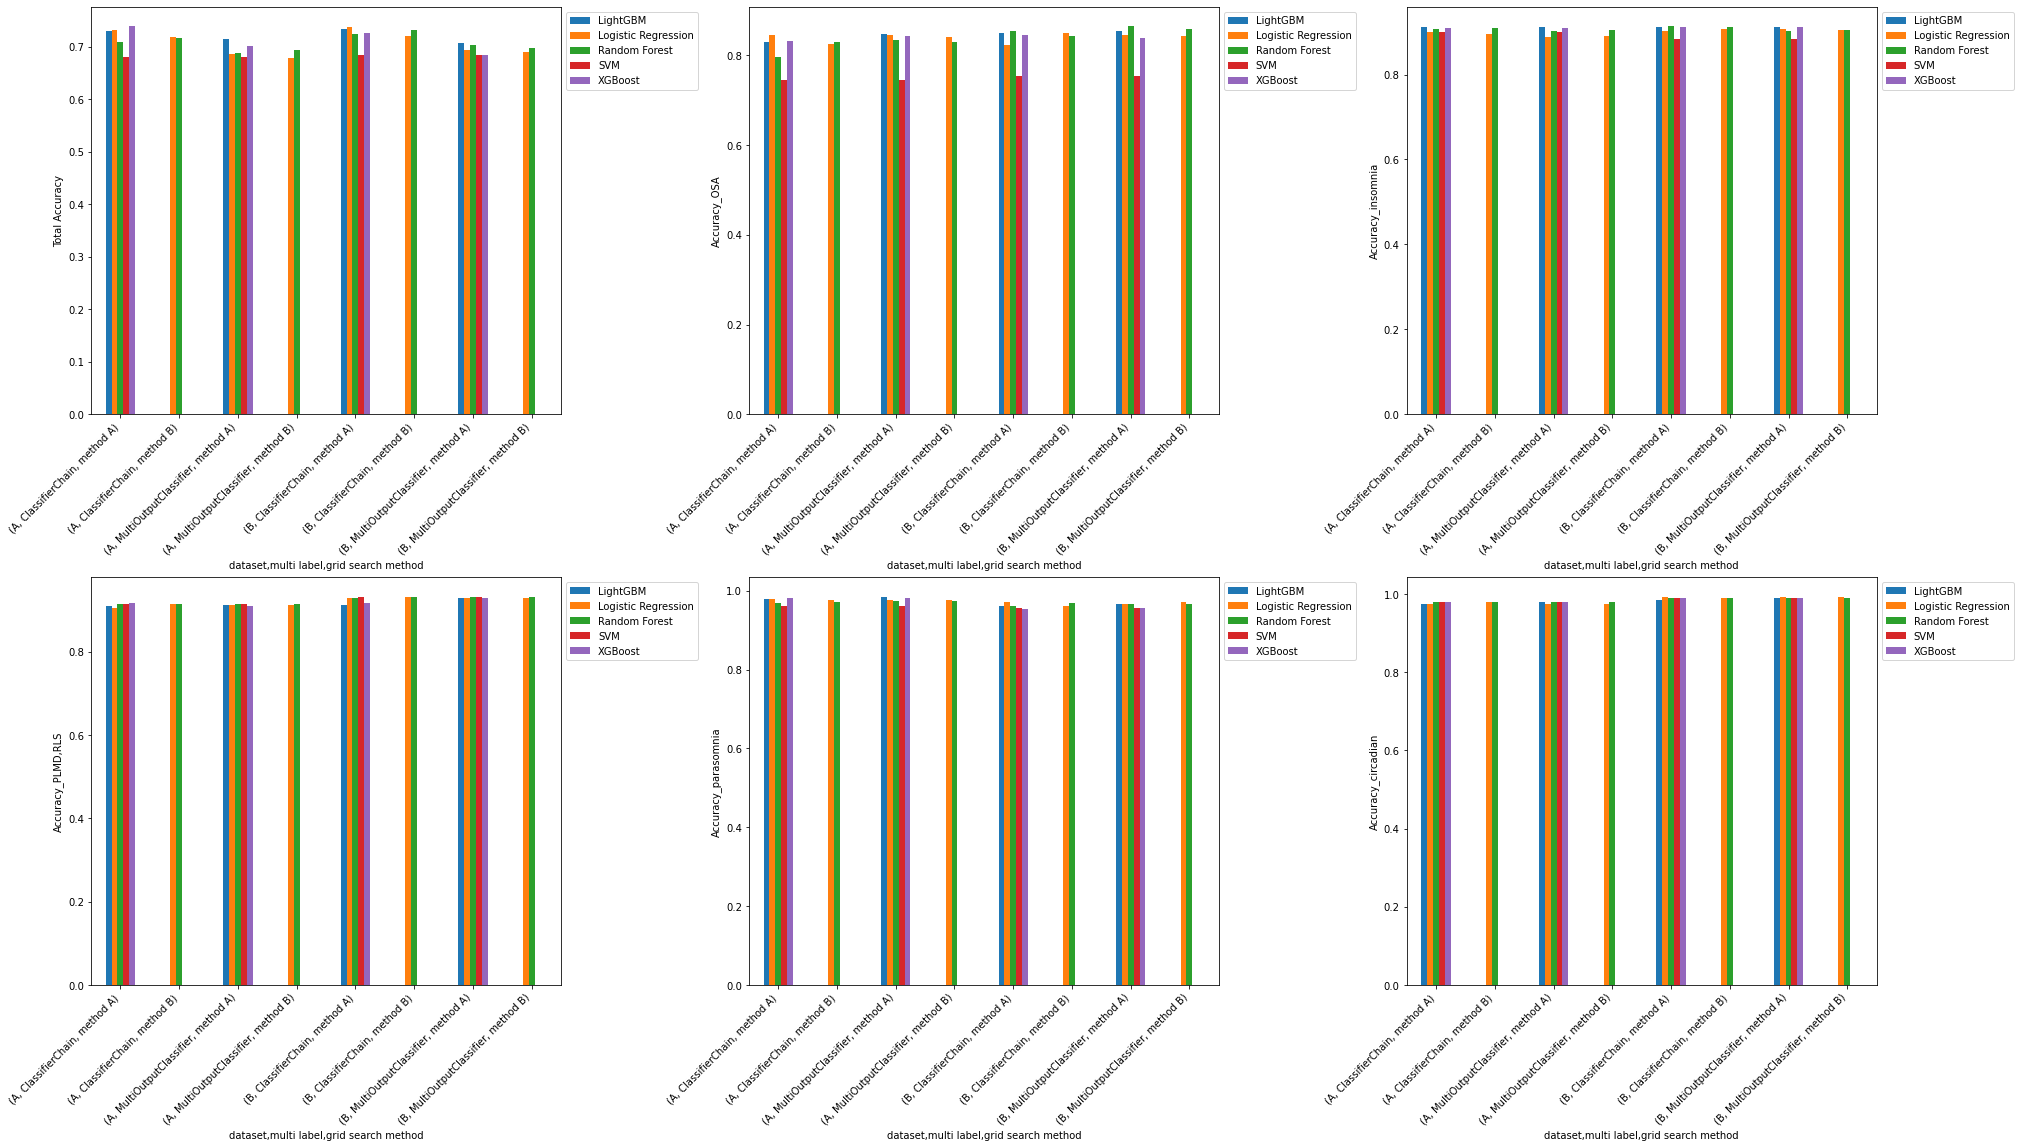

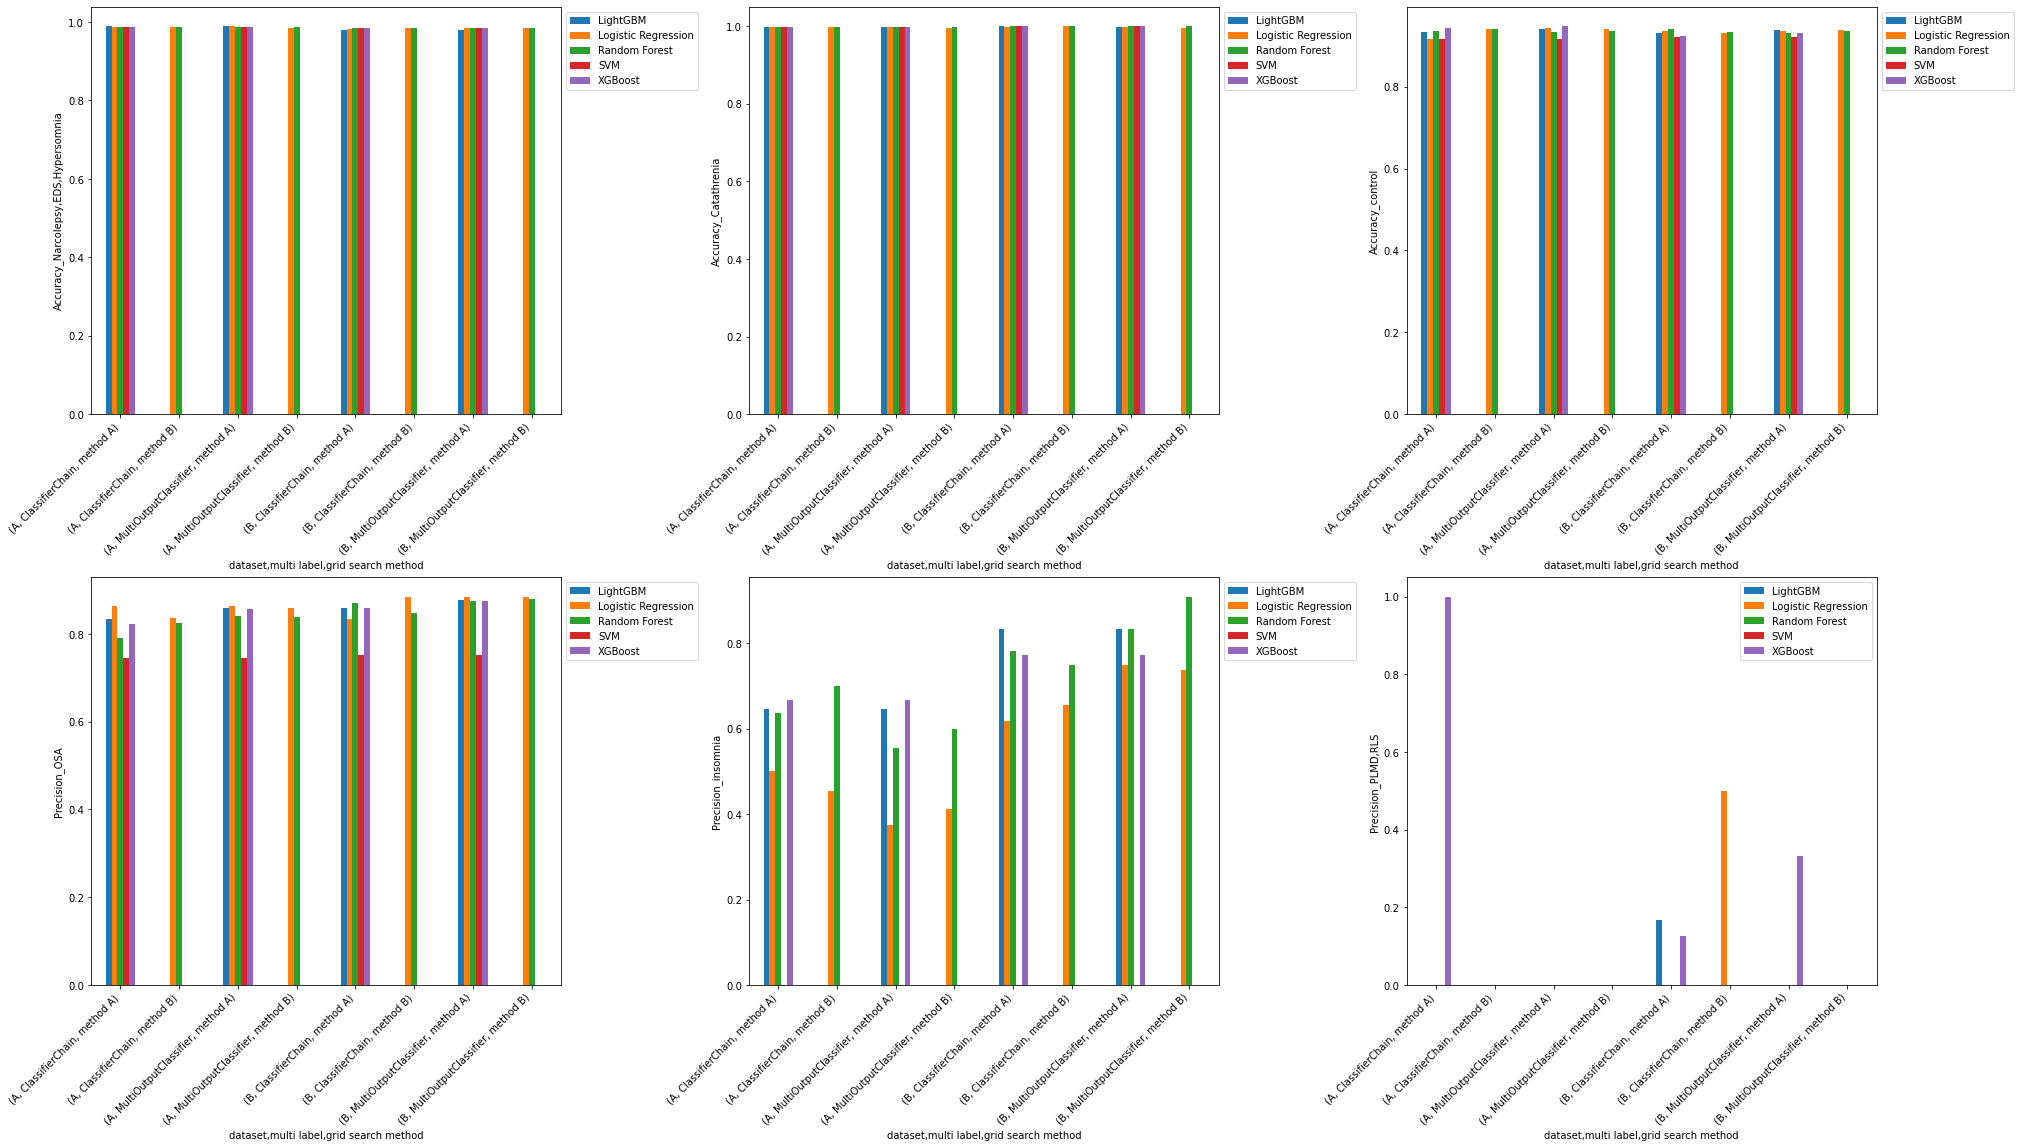

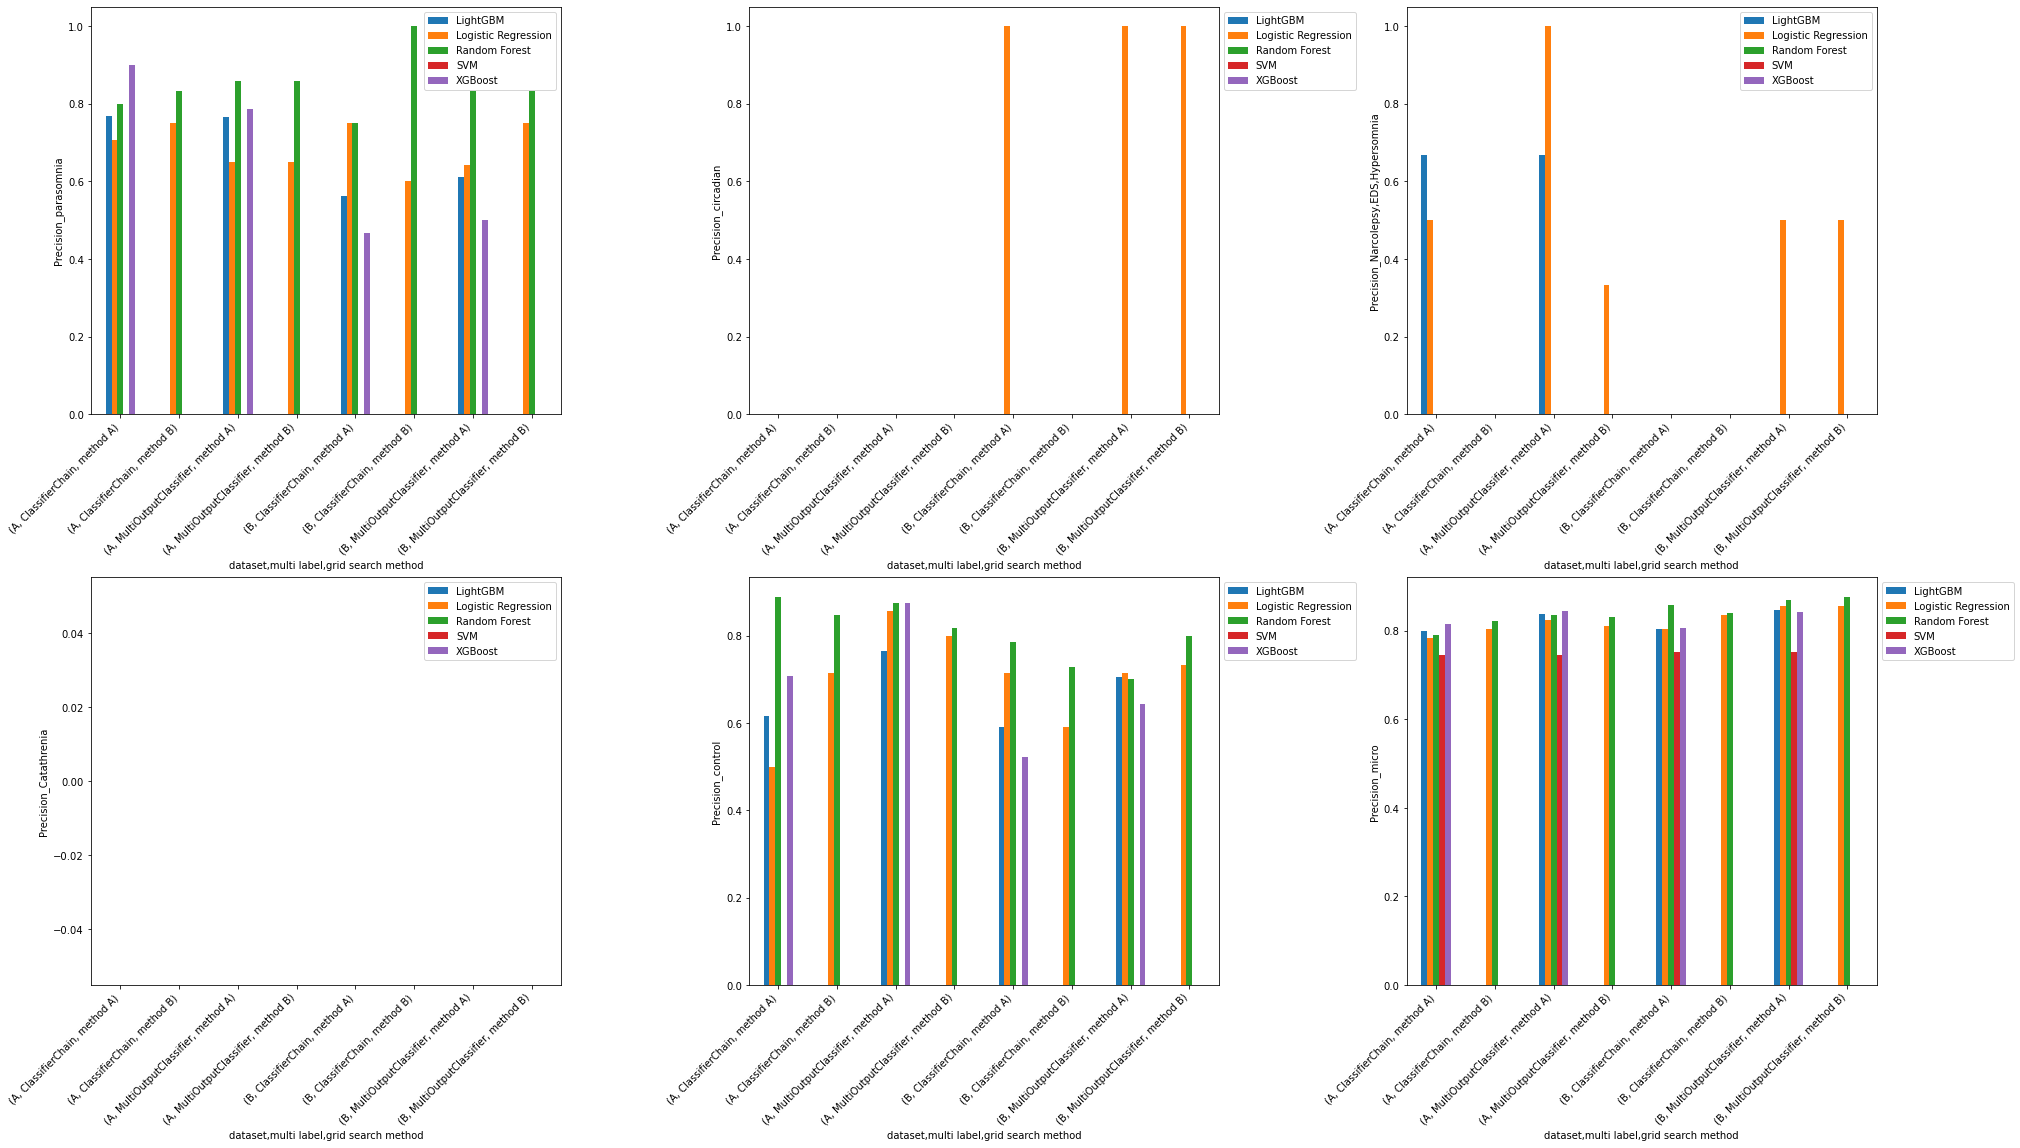

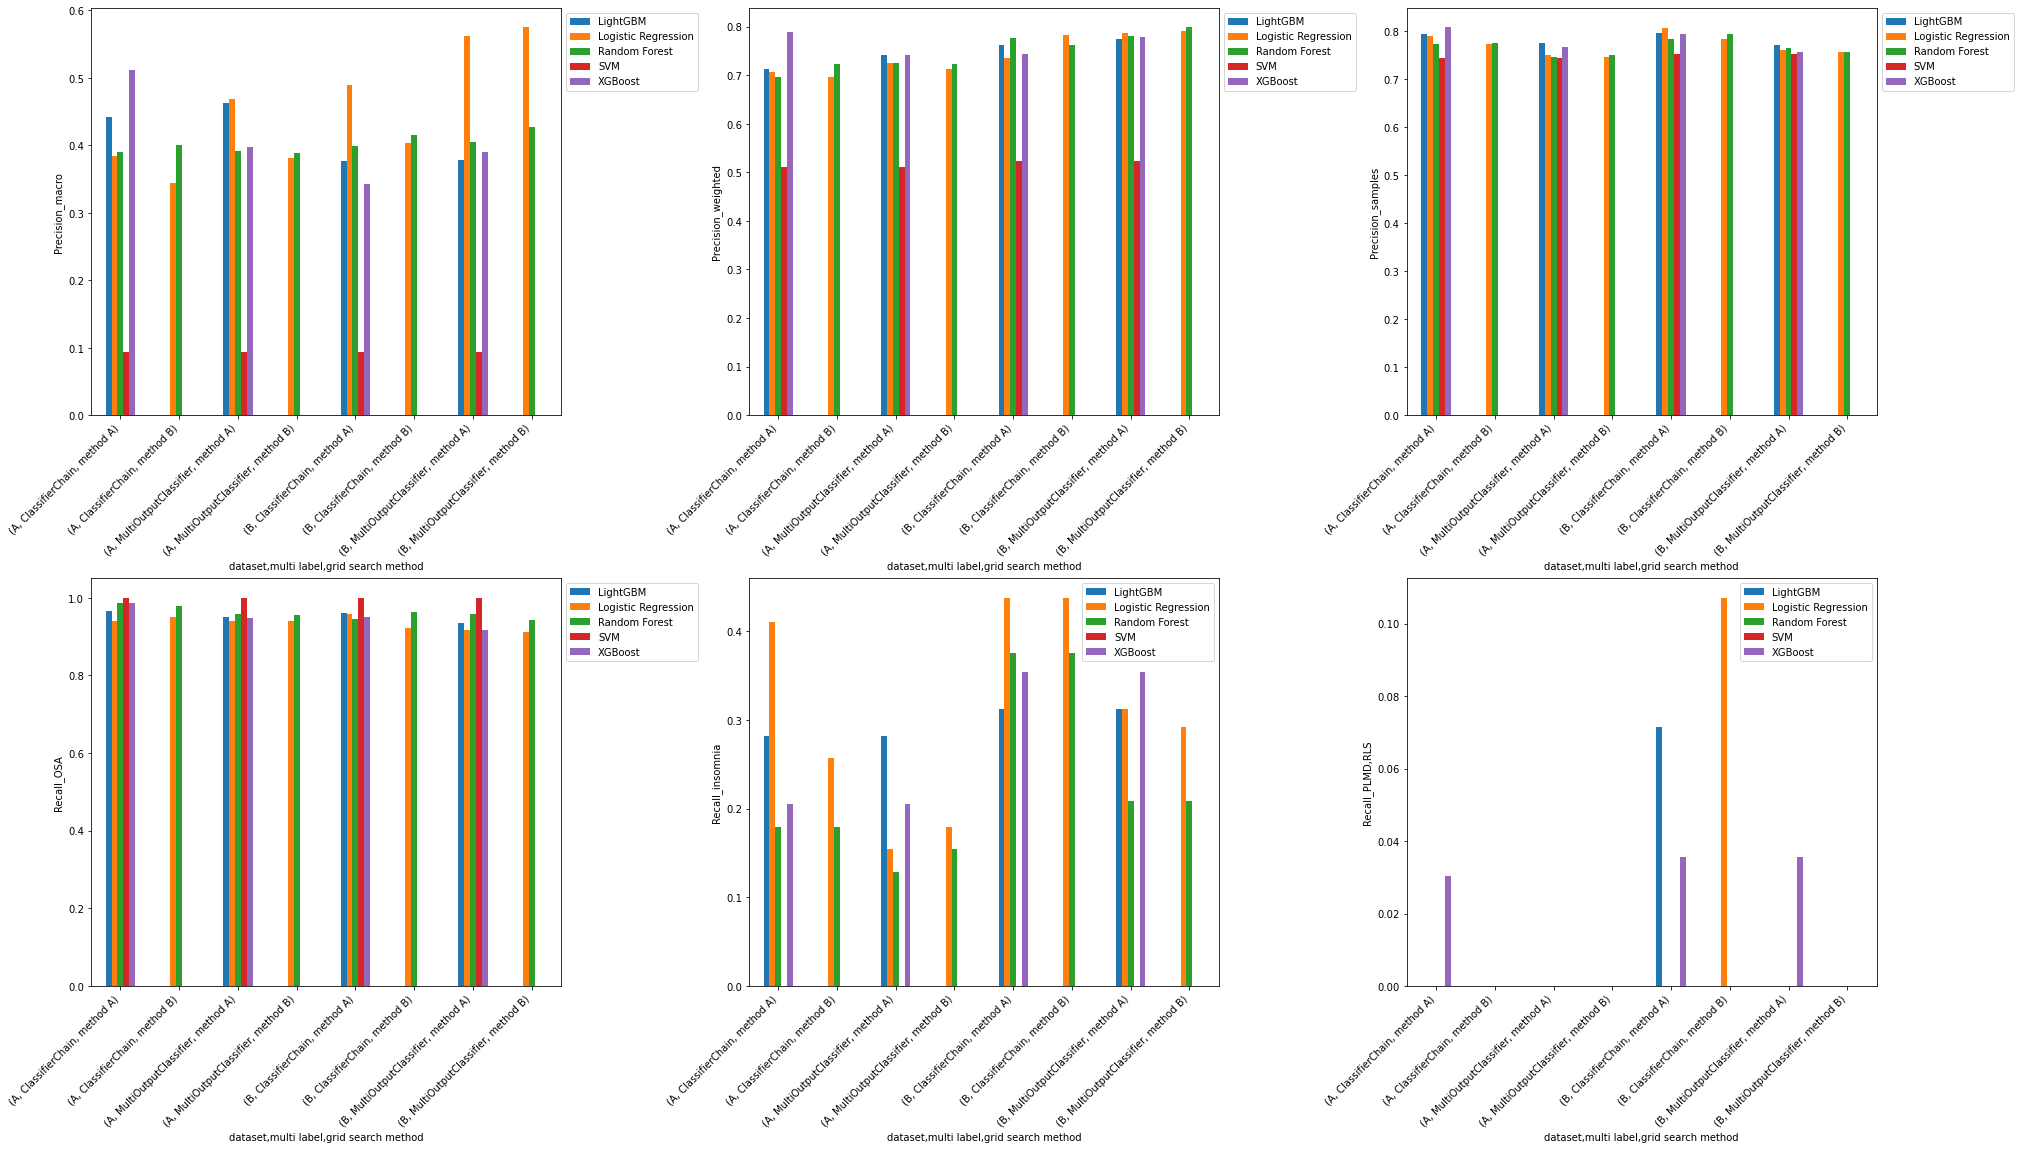

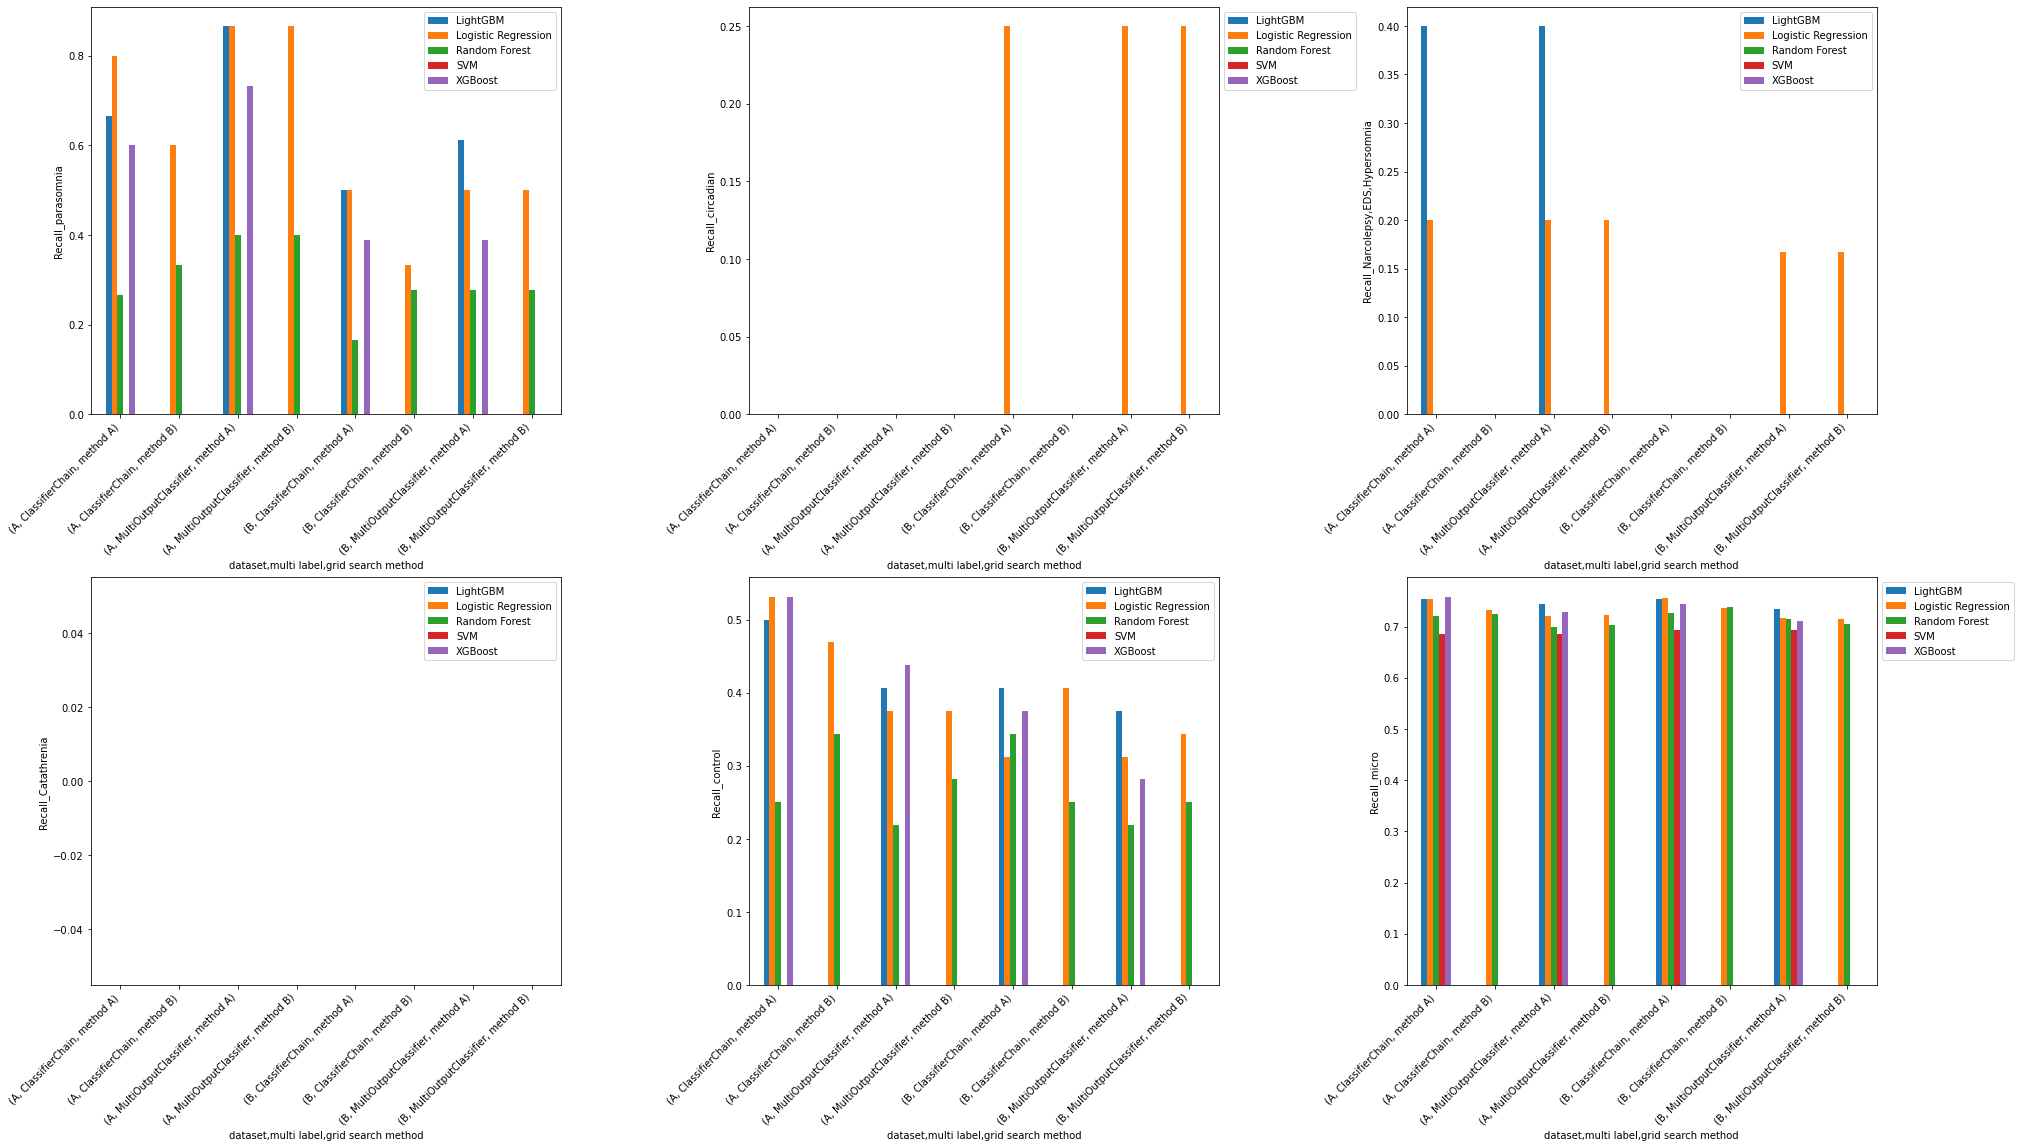

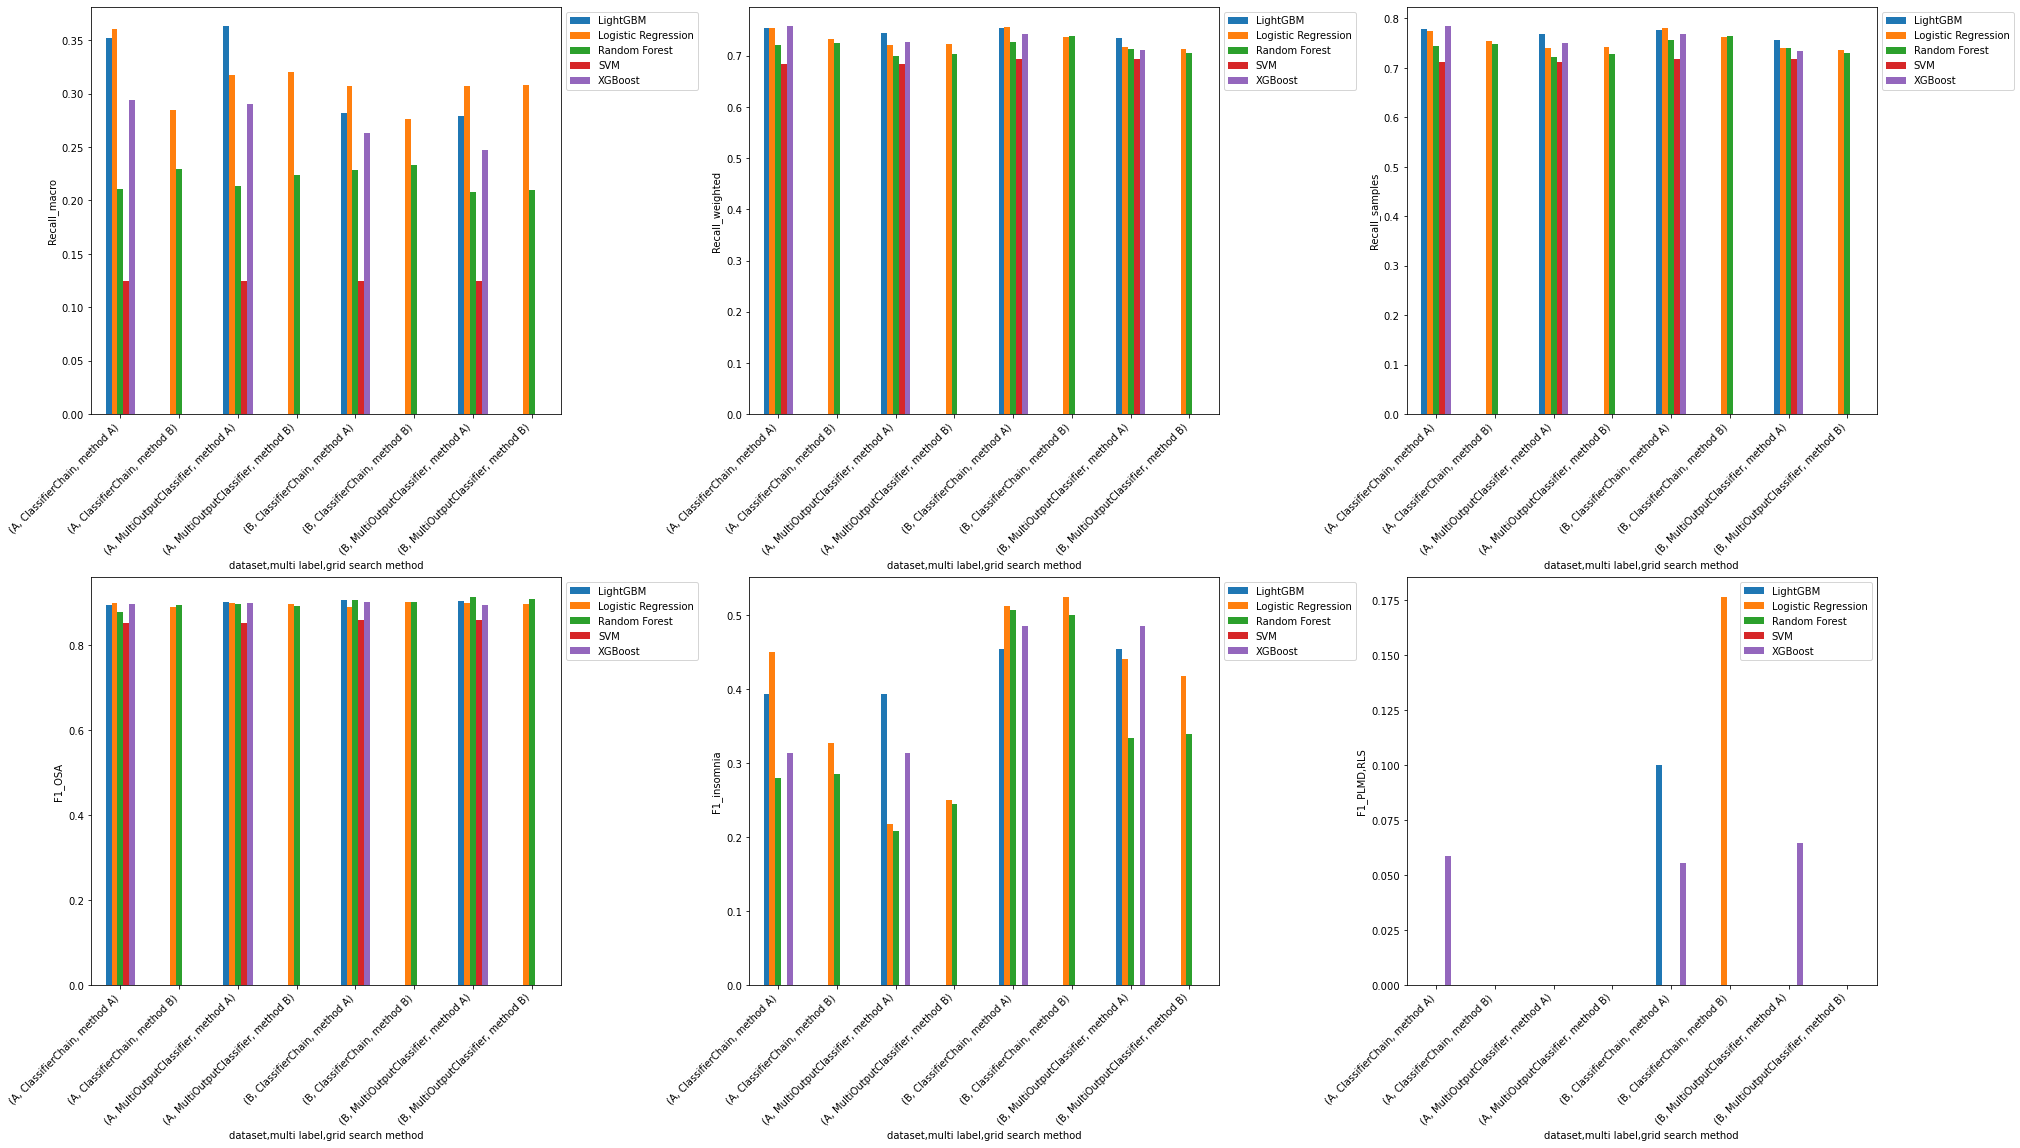

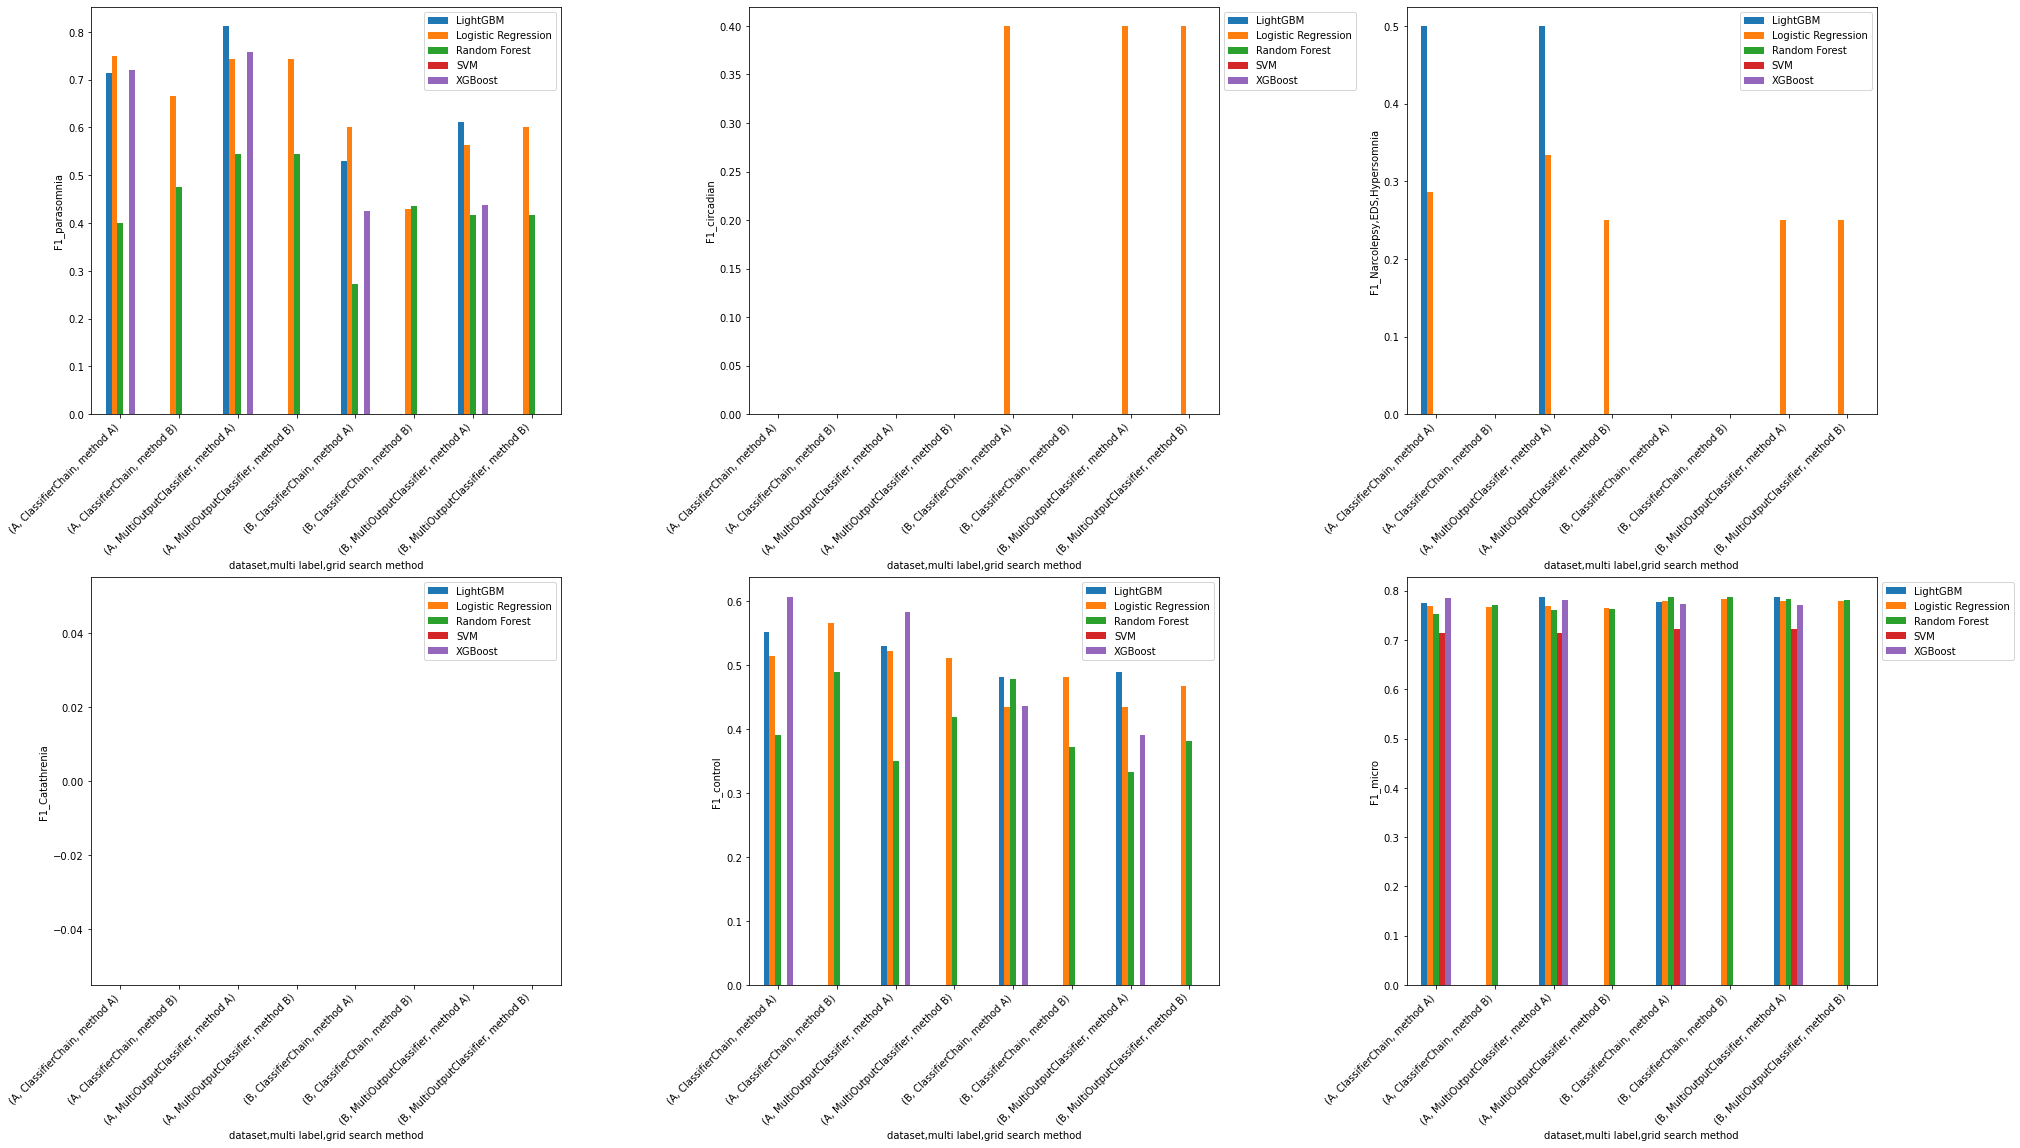

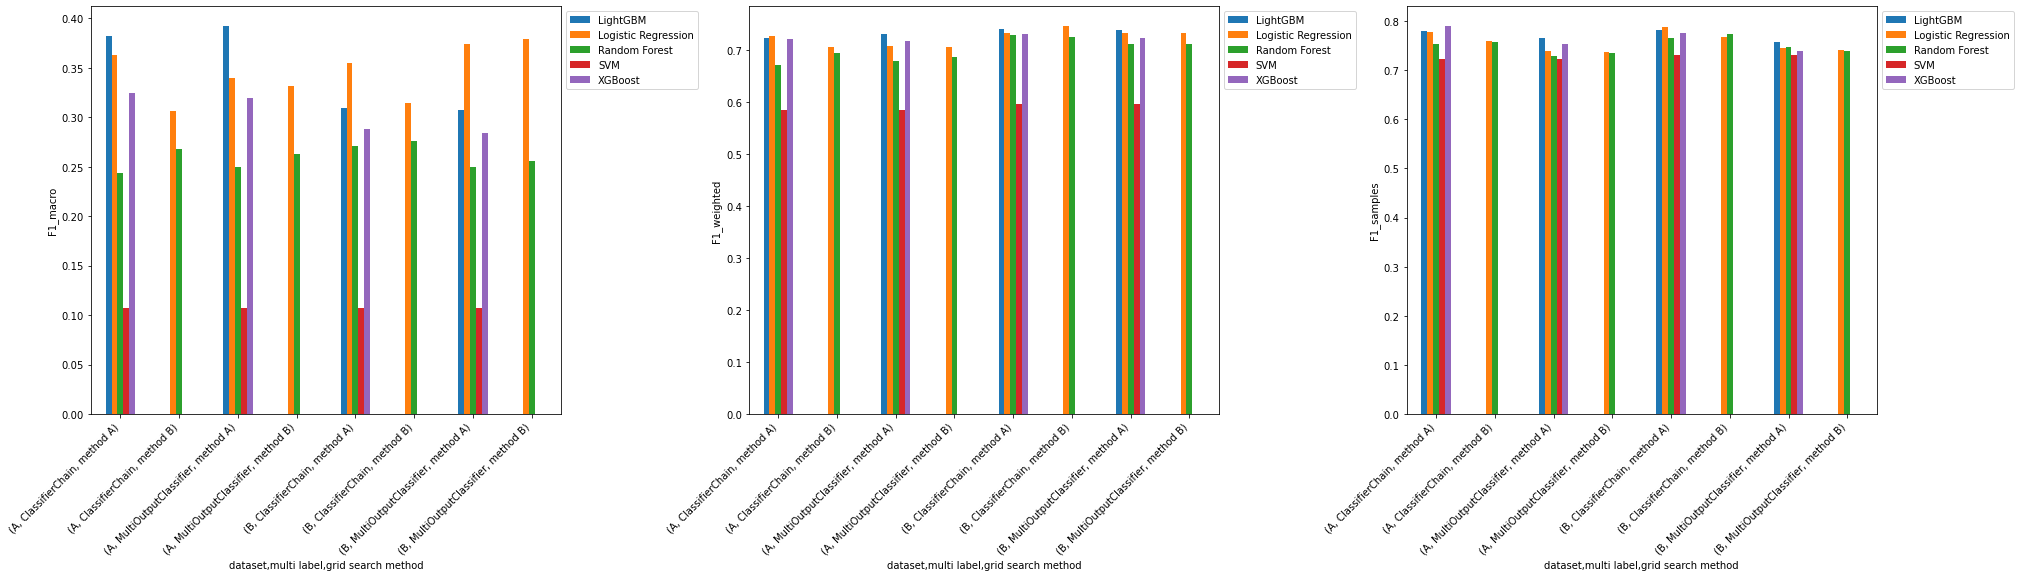

In [11]:
for cols in cols_list:
    plt.figure(figsize=(32, 18))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    for i, col in enumerate(cols):
        df = data.pivot_table(index='ML_Algorithm', columns=['dataset', 'multi label', 'grid search method'], values=col)
        ax = plt.subplot(2, 3, i+1)
        df.T.plot(kind='bar', ylabel=col, ax=ax)
        ax.legend(bbox_to_anchor=(1, 1))
        ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')

In [12]:
data_a_train = pd.read_csv('../data/survey_data_a_train.csv')
data_a_test = pd.read_csv('../data/survey_data_a_test.csv')

data_a = pd.concat([data_a_train, data_a_test], axis=0)
print(data_a.shape)

(1936, 50)


In [13]:
data_b_train = pd.read_csv('../data/survey_data_b_train.csv')
data_b_test = pd.read_csv('../data/survey_data_b_test.csv')

data_b = pd.concat([data_b_train, data_b_test], axis=0)
print(data_b.shape)

(2040, 48)


In [14]:
list(set(data_a.columns) - set(data_b.columns))

['K-BDI2', 'PSQI']